In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from tqdm import tqdm

# import dataset 1

In [41]:
data1 = pd.read_csv('../1_owid/owid-covid-data.csv')
data1 = data1[data1.continent == 'Europe']

In [42]:
data1 = data1[['iso_code', 'continent', 'location', 'date', 'total_cases',
       'new_cases_smoothed', 'total_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_smoothed_per_million',
       'total_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate',
       'icu_patients_per_million', 
       'hosp_patients_per_million', 
       'weekly_icu_admissions_per_million', 
       'weekly_hosp_admissions_per_million',
       'total_tests_per_thousand','new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 
       'total_vaccinations_per_hundred', 'stringency_index', 'population',
       'population_density', 'median_age', 'aged_65_older', 'aged_70_older',
       'gdp_per_capita', 'extreme_poverty', 'cardiovasc_death_rate',
       'diabetes_prevalence', 
       'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index']]

In [43]:
# replace 'OWID_KOS' with 'KOS'
data1.iso_code = data1.iso_code.str.replace('OWID_KOS', 'KOS')

In [44]:
iso_codes = data1.iso_code.unique()

In [45]:
locations = data1.location.unique()

### create dictionary to convert iso to location back and forth

In [46]:
code_to_location = dict(zip(iso_codes, locations))
tuple(code_to_location.items())

(('ALB', 'Albania'),
 ('AND', 'Andorra'),
 ('AUT', 'Austria'),
 ('BLR', 'Belarus'),
 ('BEL', 'Belgium'),
 ('BIH', 'Bosnia and Herzegovina'),
 ('BGR', 'Bulgaria'),
 ('HRV', 'Croatia'),
 ('CYP', 'Cyprus'),
 ('CZE', 'Czechia'),
 ('DNK', 'Denmark'),
 ('EST', 'Estonia'),
 ('FIN', 'Finland'),
 ('FRA', 'France'),
 ('DEU', 'Germany'),
 ('GRC', 'Greece'),
 ('HUN', 'Hungary'),
 ('ISL', 'Iceland'),
 ('IRL', 'Ireland'),
 ('ITA', 'Italy'),
 ('KOS', 'Kosovo'),
 ('LVA', 'Latvia'),
 ('LIE', 'Liechtenstein'),
 ('LTU', 'Lithuania'),
 ('LUX', 'Luxembourg'),
 ('MLT', 'Malta'),
 ('MDA', 'Moldova'),
 ('MCO', 'Monaco'),
 ('MNE', 'Montenegro'),
 ('NLD', 'Netherlands'),
 ('MKD', 'North Macedonia'),
 ('NOR', 'Norway'),
 ('POL', 'Poland'),
 ('PRT', 'Portugal'),
 ('ROU', 'Romania'),
 ('RUS', 'Russia'),
 ('SMR', 'San Marino'),
 ('SRB', 'Serbia'),
 ('SVK', 'Slovakia'),
 ('SVN', 'Slovenia'),
 ('ESP', 'Spain'),
 ('SWE', 'Sweden'),
 ('CHE', 'Switzerland'),
 ('UKR', 'Ukraine'),
 ('GBR', 'United Kingdom'),
 ('VAT', 'Vat

In [47]:
location_to_code = dict(zip(locations, iso_codes))
tuple(location_to_code.items())

(('Albania', 'ALB'),
 ('Andorra', 'AND'),
 ('Austria', 'AUT'),
 ('Belarus', 'BLR'),
 ('Belgium', 'BEL'),
 ('Bosnia and Herzegovina', 'BIH'),
 ('Bulgaria', 'BGR'),
 ('Croatia', 'HRV'),
 ('Cyprus', 'CYP'),
 ('Czechia', 'CZE'),
 ('Denmark', 'DNK'),
 ('Estonia', 'EST'),
 ('Finland', 'FIN'),
 ('France', 'FRA'),
 ('Germany', 'DEU'),
 ('Greece', 'GRC'),
 ('Hungary', 'HUN'),
 ('Iceland', 'ISL'),
 ('Ireland', 'IRL'),
 ('Italy', 'ITA'),
 ('Kosovo', 'KOS'),
 ('Latvia', 'LVA'),
 ('Liechtenstein', 'LIE'),
 ('Lithuania', 'LTU'),
 ('Luxembourg', 'LUX'),
 ('Malta', 'MLT'),
 ('Moldova', 'MDA'),
 ('Monaco', 'MCO'),
 ('Montenegro', 'MNE'),
 ('Netherlands', 'NLD'),
 ('North Macedonia', 'MKD'),
 ('Norway', 'NOR'),
 ('Poland', 'POL'),
 ('Portugal', 'PRT'),
 ('Romania', 'ROU'),
 ('Russia', 'RUS'),
 ('San Marino', 'SMR'),
 ('Serbia', 'SRB'),
 ('Slovakia', 'SVK'),
 ('Slovenia', 'SVN'),
 ('Spain', 'ESP'),
 ('Sweden', 'SWE'),
 ('Switzerland', 'CHE'),
 ('Ukraine', 'UKR'),
 ('United Kingdom', 'GBR'),
 ('Vatican', 

In [48]:
data1.date = pd.to_datetime(data1.date)

In [49]:
data1.set_index('date', inplace=True)

# some time series plots

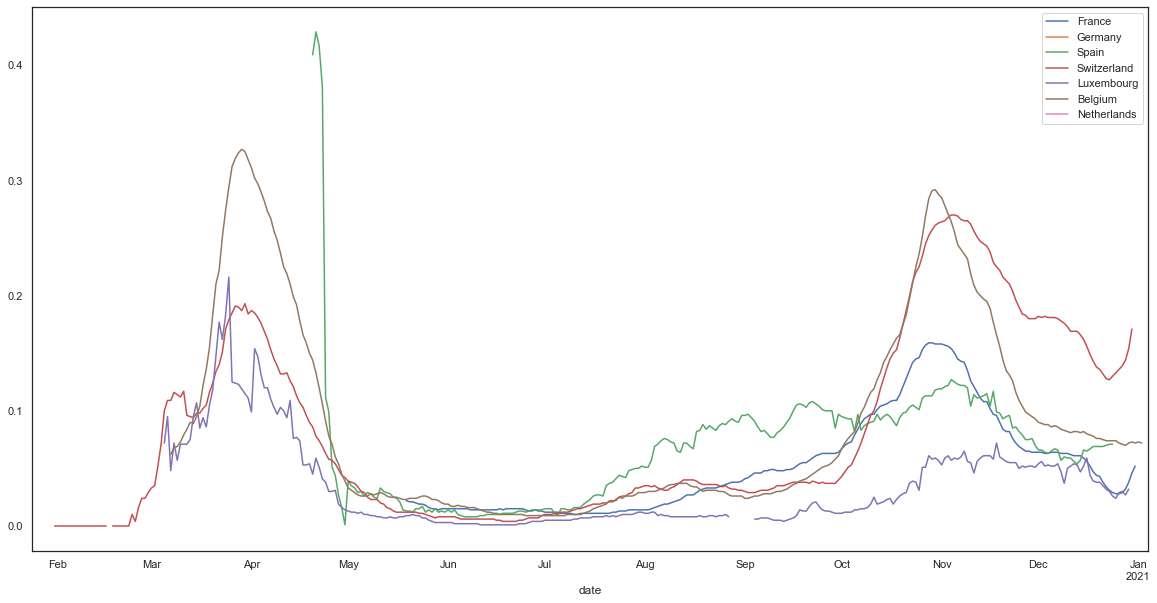

In [50]:
countries = ['France','Germany','Spain','Switzerland','Luxembourg','Belgium','Netherlands']

plt.figure(figsize=(20,10))
for c in countries:
    data1[data1.location == c]['positive_rate'].plot()

plt.legend(countries)

# North

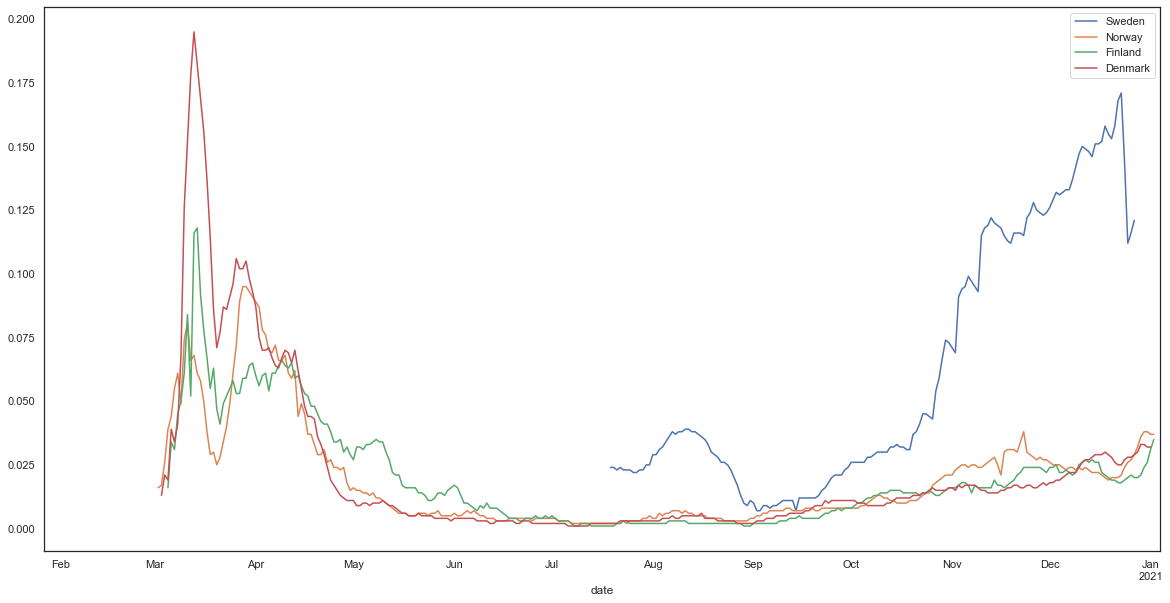

In [51]:
plt.figure(figsize=(20,10))
countries = ['Sweden','Norway','Finland','Denmark']
for c in countries:
    data1[data1.location == c]['positive_rate'].plot()

plt.legend(countries)

# unstack the data from long to wide form

In [52]:
data1_cases = data1.reset_index().set_index(['date','iso_code']).unstack()

# Correlation after removing cross-sectional mean

In [53]:
cross_section_mean = data1_cases['positive_rate'].mean(axis=1)

In [54]:
data1_case_demean = data1_cases['positive_rate'].subtract(cross_section_mean, axis='rows')

In [55]:
data1_case_demean.shape

(347, 46)

In [56]:
# remove missing
# data1_case_demean=data1_case_demean.loc[:,~data1_case_demean.isnull().values.all(axis=0)]
# data1_case_demean.shape

In [57]:
data1_case_demean_corr_iso = data1_case_demean.corr()
data1_case_demean_corr_iso

iso_code,ALB,AND,AUT,BEL,BGR,BIH,BLR,CHE,CYP,CZE,...,PRT,ROU,RUS,SMR,SRB,SVK,SVN,SWE,UKR,VAT
iso_code,,,,,,,,,,,,,,,,,,,,,
ALB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AND,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AUT,NaN,NaN,1.000000,0.239890,0.409465,NaN,-0.730836,0.544231,-0.243944,0.206641,...,-0.016859,0.469562,-0.381796,NaN,-0.035226,0.041943,0.435246,-0.529367,-0.045554,NaN
BEL,NaN,NaN,0.239890,1.000000,-0.206973,NaN,-0.503045,0.718721,0.127614,-0.082208,...,0.095953,-0.274667,-0.262283,NaN,0.047856,-0.434093,-0.213109,-0.675433,-0.467706,NaN
BGR,NaN,NaN,0.409465,-0.206973,1.000000,NaN,-0.752862,0.490655,-0.865444,0.327088,...,-0.523378,0.886265,-0.834490,NaN,0.825068,0.429256,0.855071,-0.222609,0.676676,NaN
BIH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLR,NaN,NaN,-0.730836,-0.503045,-0.752862,NaN,1.000000,-0.753997,0.796240,-0.520409,...,0.457035,-0.592047,0.914762,NaN,-0.428908,-0.358450,-0.598434,0.771639,-0.635801,NaN
CHE,NaN,NaN,0.544231,0.718721,0.490655,NaN,-0.753997,1.000000,-0.542241,0.415082,...,-0.291932,0.367108,-0.739167,NaN,0.242247,0.097864,0.463575,-0.788614,0.164864,NaN
CYP,NaN,NaN,-0.243944,0.127614,-0.865444,NaN,0.796240,-0.542241,1.000000,-0.570901,...,0.702205,-0.861783,0.932801,NaN,-0.729376,-0.611689,-0.824691,0.355625,-0.820174,NaN


### change iso to location

In [58]:
data1_case_demean_corr_loc = data1_case_demean_corr_iso.copy()
data1_case_demean_corr_loc.columns = [code_to_location[c] for c in data1_case_demean_corr_iso.columns]
data1_case_demean_corr_loc.index = [code_to_location[c] for c in data1_case_demean_corr_iso.columns]
data1_case_demean_corr_loc

,Albania,Andorra,Austria,Belgium,Bulgaria,Bosnia and Herzegovina,Belarus,Switzerland,Cyprus,Czechia,...,Portugal,Romania,Russia,San Marino,Serbia,Slovakia,Slovenia,Sweden,Ukraine,Vatican
Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Austria,NaN,NaN,1.000000,0.239890,0.409465,NaN,-0.730836,0.544231,-0.243944,0.206641,...,-0.016859,0.469562,-0.381796,NaN,-0.035226,0.041943,0.435246,-0.529367,-0.045554,NaN
Belgium,NaN,NaN,0.239890,1.000000,-0.206973,NaN,-0.503045,0.718721,0.127614,-0.082208,...,0.095953,-0.274667,-0.262283,NaN,0.047856,-0.434093,-0.213109,-0.675433,-0.467706,NaN
Bulgaria,NaN,NaN,0.409465,-0.206973,1.000000,NaN,-0.752862,0.490655,-0.865444,0.327088,...,-0.523378,0.886265,-0.834490,NaN,0.825068,0.429256,0.855071,-0.222609,0.676676,NaN
Bosnia and Herzegovina,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Belarus,NaN,NaN,-0.730836,-0.503045,-0.752862,NaN,1.000000,-0.753997,0.796240,-0.520409,...,0.457035,-0.592047,0.914762,NaN,-0.428908,-0.358450,-0.598434,0.771639,-0.635801,NaN
Switzerland,NaN,NaN,0.544231,0.718721,0.490655,NaN,-0.753997,1.000000,-0.542241,0.415082,...,-0.291932,0.367108,-0.739167,NaN,0.242247,0.097864,0.463575,-0.788614,0.164864,NaN
Cyprus,NaN,NaN,-0.243944,0.127614,-0.865444,NaN,0.796240,-0.542241,1.000000,-0.570901,...,0.702205,-0.861783,0.932801,NaN,-0.729376,-0.611689,-0.824691,0.355625,-0.820174,NaN
Czechia,NaN,NaN,0.206641,-0.082208,0.327088,NaN,-0.520409,0.415082,-0.570901,1.000000,...,-0.333670,0.490349,-0.459565,NaN,-0.160445,0.883138,0.689856,-0.735923,0.515456,NaN


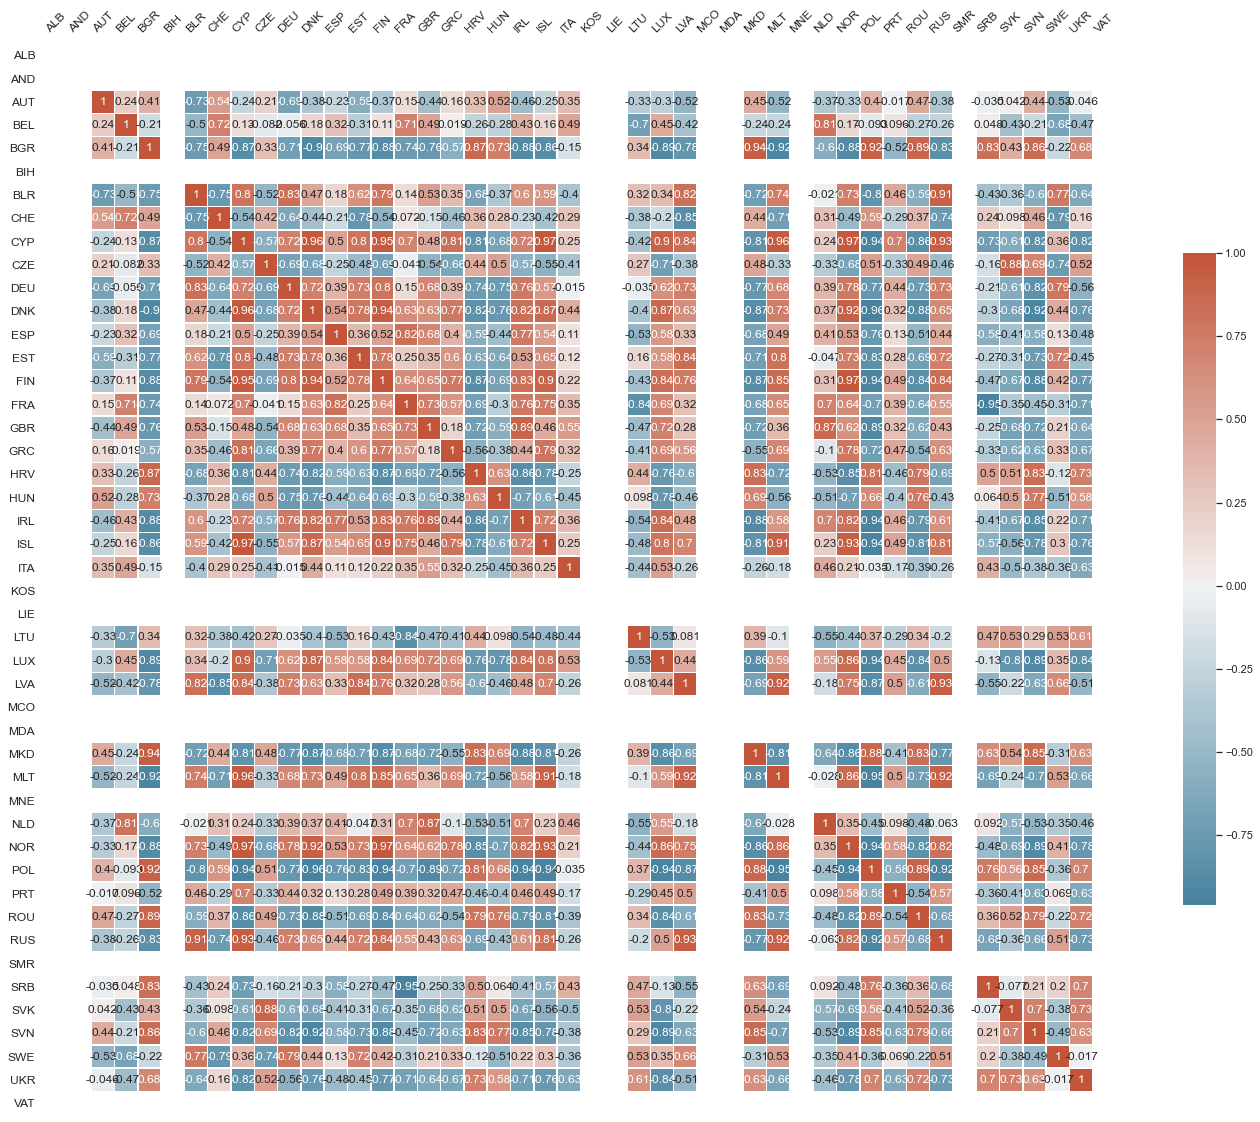

In [59]:
plt.figure(figsize=(24,24))
sns.set_theme(style='white')
cmap = sns.diverging_palette(230, 20, as_cmap=True)
hm = sns.heatmap(data1_case_demean_corr_iso, square=True, cmap=cmap, center=0,
                annot=True, xticklabels=True, yticklabels=True, 
                cbar_kws={'shrink': 0.5}, cbar=True, linewidths=.5)
hm.set_xticklabels(hm.get_xticklabels(), rotation=45) 
hm.set_yticklabels(hm.get_yticklabels(), rotation=0)
hm.set(xlabel=None, ylabel=None)
hm.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
plt.show()

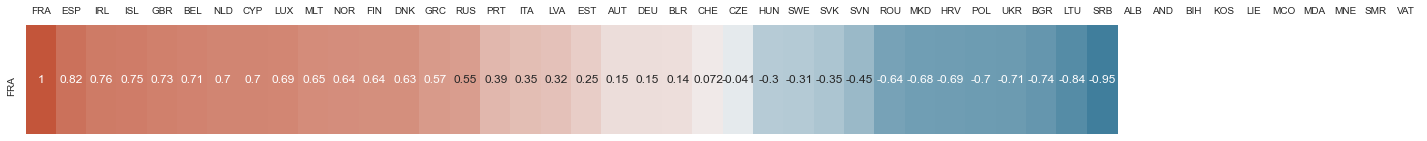

In [60]:
plt.figure(figsize=(25,2))
hm = sns.heatmap(data1_case_demean_corr_iso.loc[['FRA']].sort_values(by='FRA', axis=1, ascending=False), 
           annot=True, cmap=cmap, cbar=False)
hm.set(xlabel=None, ylabel=None)
hm.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, labeltop=True)

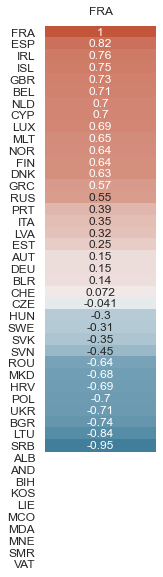

In [61]:
plt.figure(figsize=(2,10))
hm = sns.heatmap(data1_case_demean_corr_iso[['FRA']].sort_values('FRA', ascending=False), annot=True, cmap=cmap, cbar=False)
hm.set(xlabel=None, ylabel=None)
hm.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)

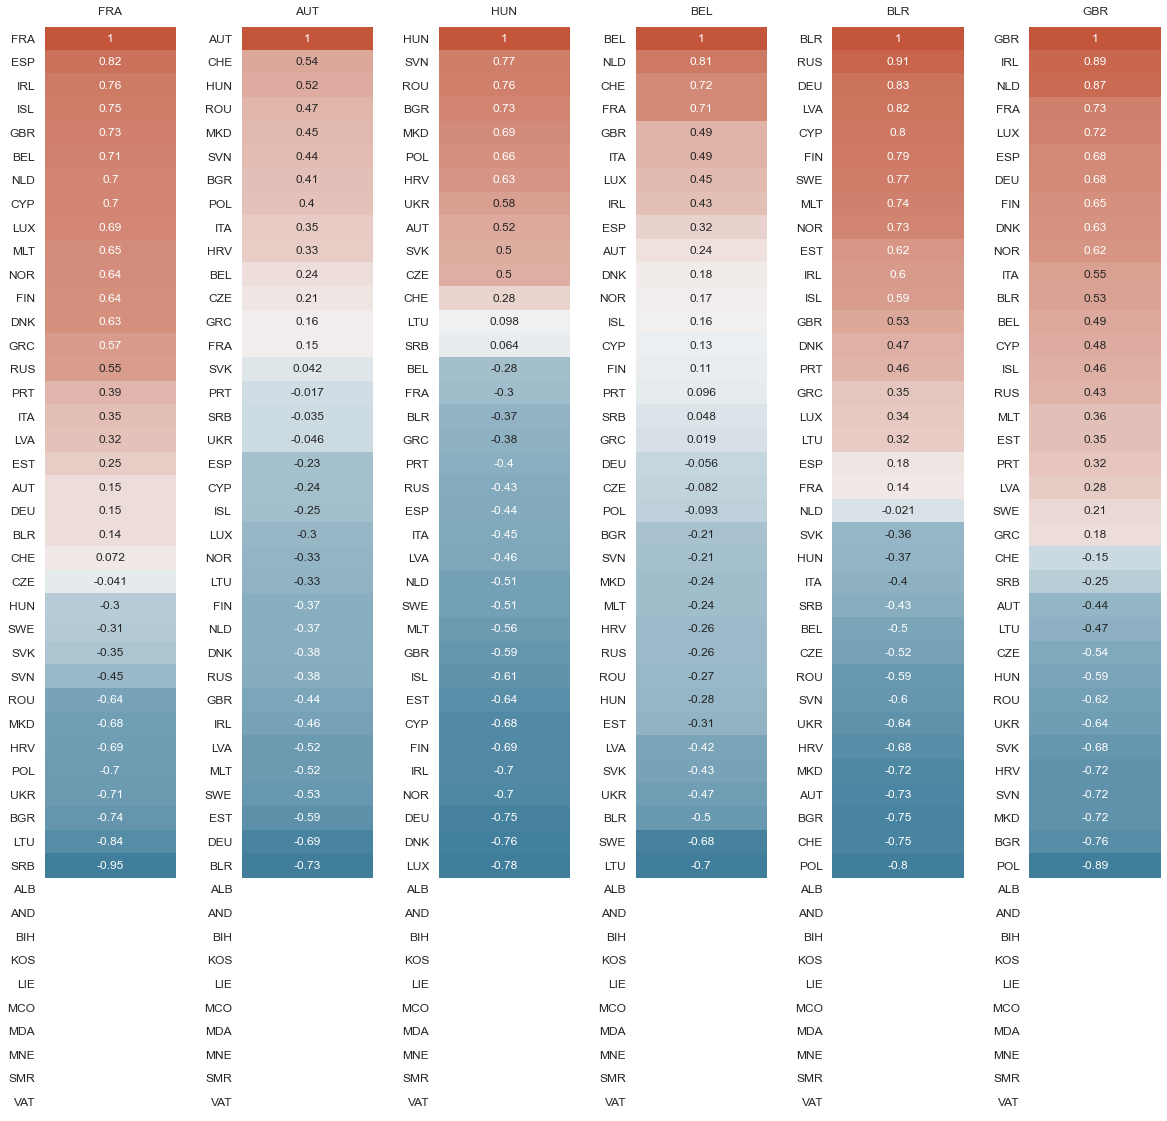

In [62]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(1,6, figsize=(20,20))
#fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=0.5)
g1=sns.heatmap(data1_case_demean_corr_iso[['FRA']].sort_values('FRA',ascending=False), annot=True, ax=ax1, cmap=cmap, cbar=False)
g2=sns.heatmap(data1_case_demean_corr_iso[['AUT']].sort_values('AUT',ascending=False), annot=True, ax=ax2, cmap=cmap, cbar=False)
g3=sns.heatmap(data1_case_demean_corr_iso[['HUN']].sort_values('HUN',ascending=False), annot=True, ax=ax3, cmap=cmap, cbar=False)
g4=sns.heatmap(data1_case_demean_corr_iso[['BEL']].sort_values('BEL',ascending=False), annot=True, ax=ax4, cmap=cmap, cbar=False)
g5=sns.heatmap(data1_case_demean_corr_iso[['BLR']].sort_values('BLR',ascending=False), annot=True, ax=ax5, cmap=cmap, cbar=False)
g6=sns.heatmap(data1_case_demean_corr_iso[['GBR']].sort_values('GBR',ascending=False), annot=True, ax=ax6, cmap=cmap, cbar=False)

g1.set(xlabel=None, ylabel=None)
g2.set(xlabel=None, ylabel=None)
g3.set(xlabel=None, ylabel=None)
g4.set(xlabel=None, ylabel=None)
g5.set(xlabel=None, ylabel=None)
g6.set(xlabel=None, ylabel=None)

g1.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g2.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g3.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g4.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g5.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g6.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()

# Time cross correlations

In [63]:
def crosscorr(datax, datay, lag=0, wrap=False):
    """ Lag-N cross correlation. 
    Shifted data filled with NaNs 
    
    Parameters
    ----------
    lag : int, default 0
    datax, datay : pandas.Series objects of equal length
    Returns
    ----------
    crosscorr : float
    """
    if wrap:
        shiftedy = datay.shift(lag)
        shiftedy.iloc[:lag] = datay.iloc[-lag:].values
        return datax.corr(shiftedy)
    else: 
        return datax.corr(datay.shift(lag))

In [ ]:
# def lag_best(a,b):
#     co=[]
#     for ii in range(-5,5):
#         aa=a.shift(ii)
#         bb=b
#         if ii>0:
#             aa=aa.iloc[ii:]
#             bb=bb.iloc[ii:]
#         else:
#             aa=aa.iloc[:ii]
#             bb=bb.iloc[:ii]
#         co.append(aa.corr(bb))
#     return np.array(co).argmax()-5

# lead lag correlations to France

In [64]:
iso = 'FRA'
d1 = data1_cases['positive_rate'][iso].dropna()

100%|██████████| 46/46 [00:04<00:00,  9.27it/s]


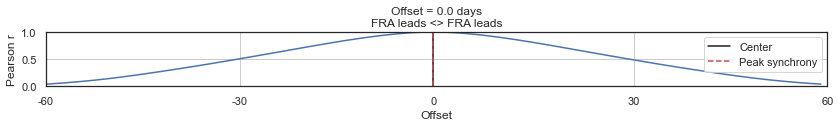

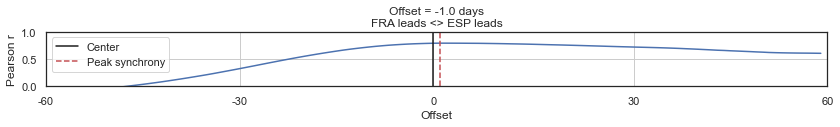

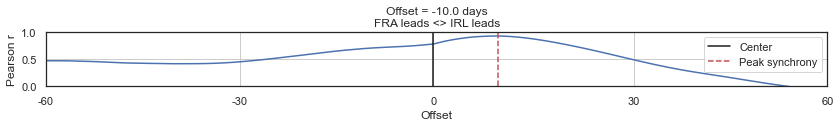

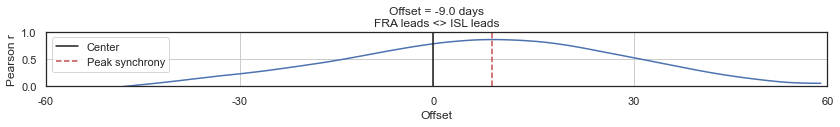

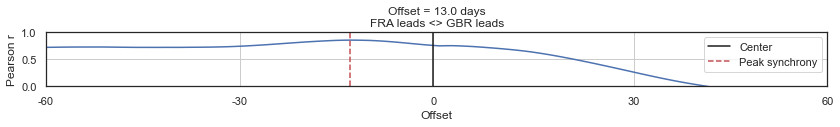

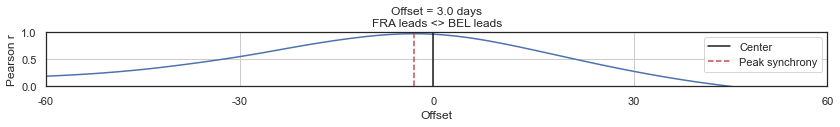

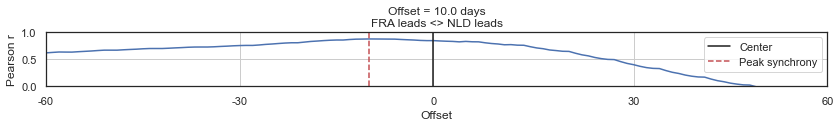

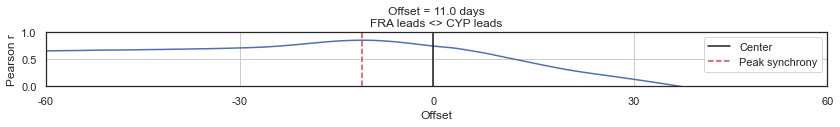

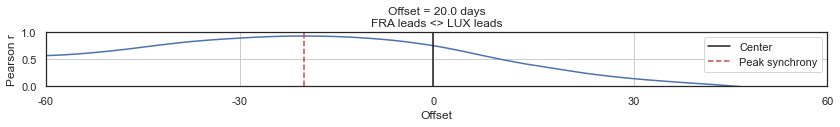

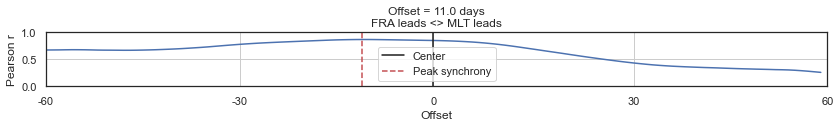

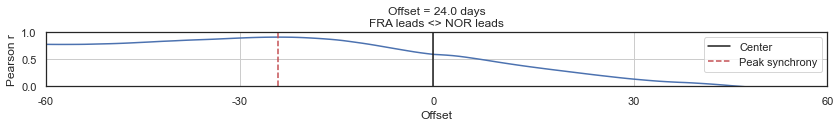

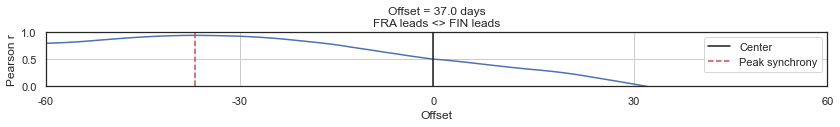

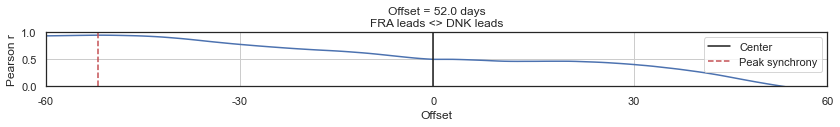

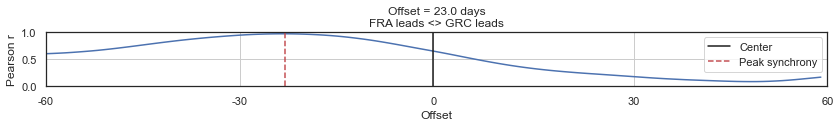

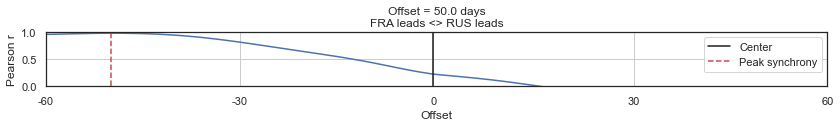

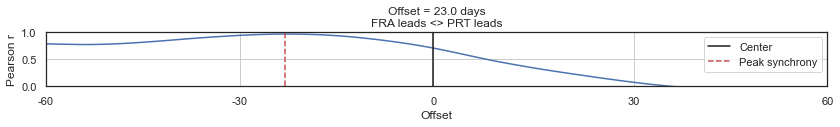

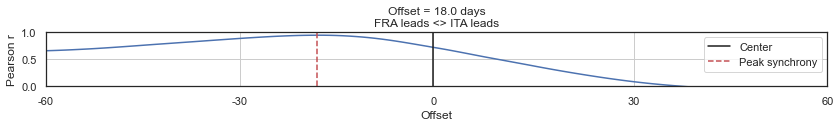

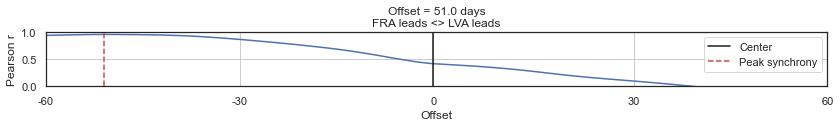

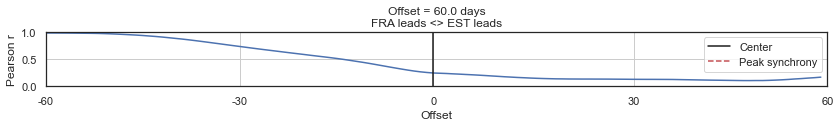

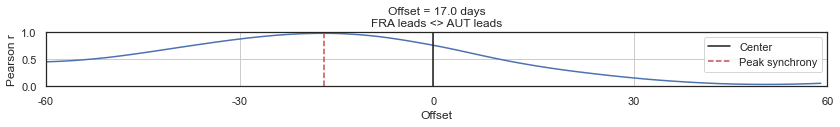

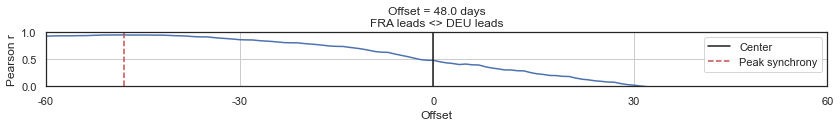

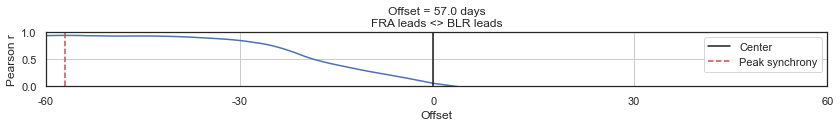

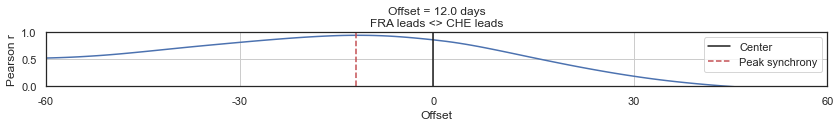

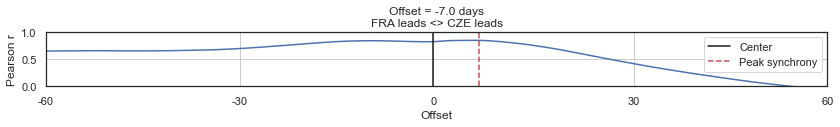

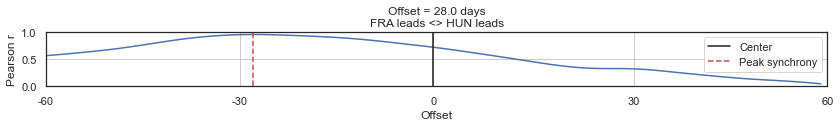

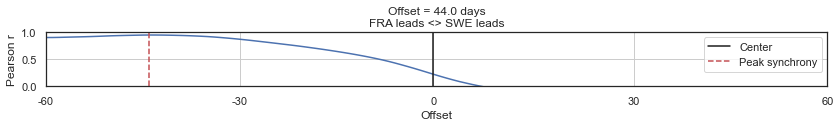

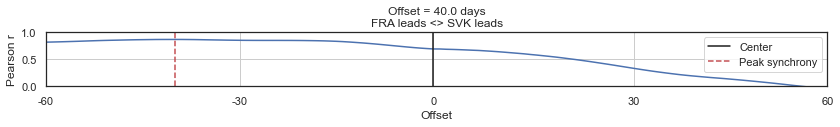

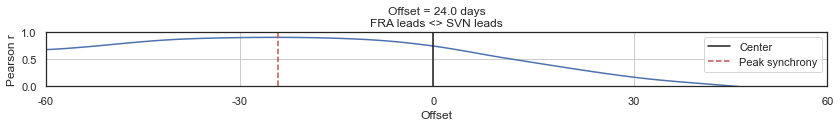

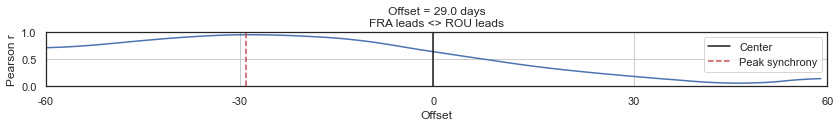

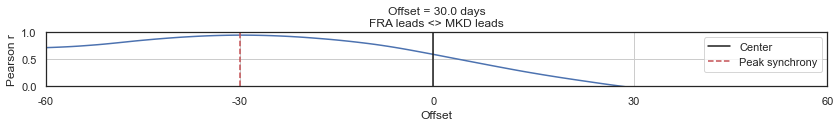

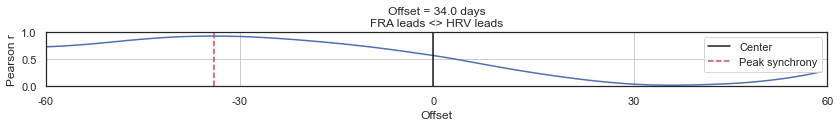

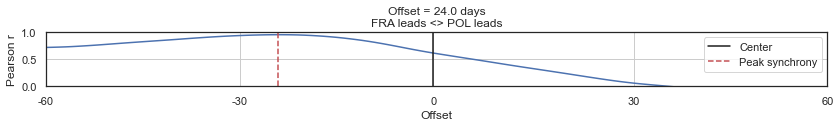

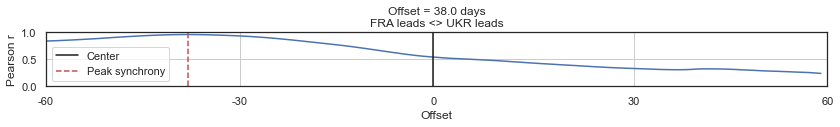

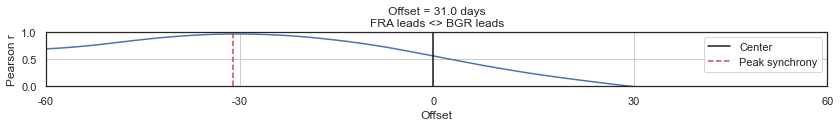

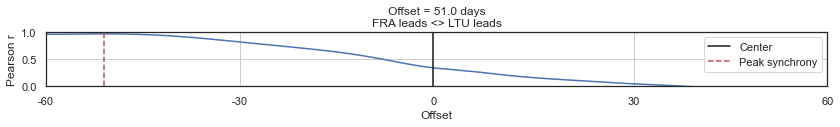

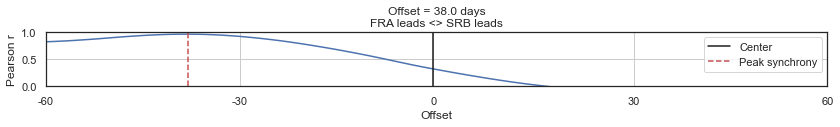

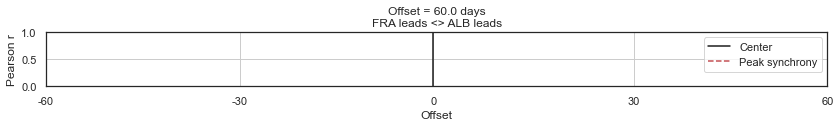

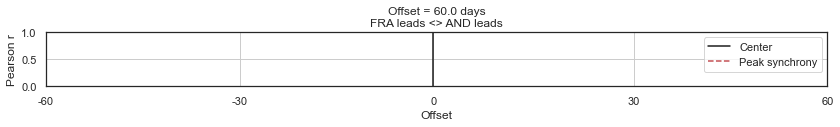

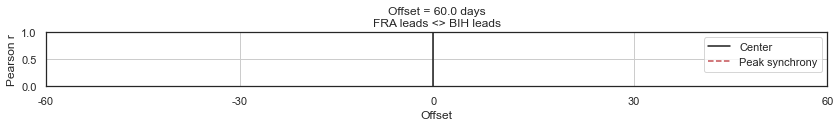

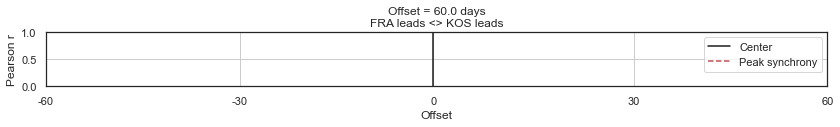

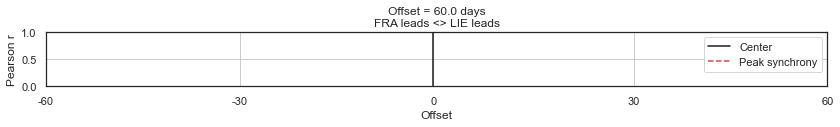

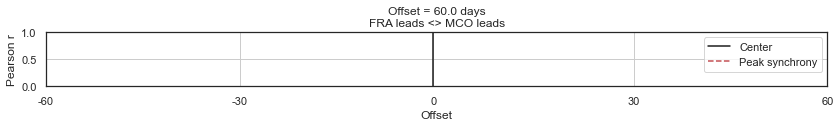

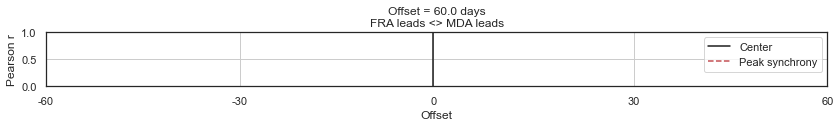

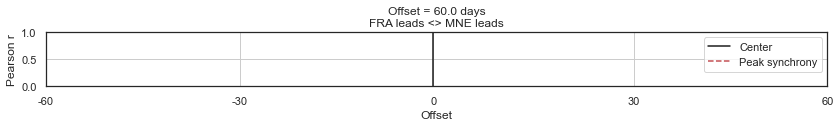

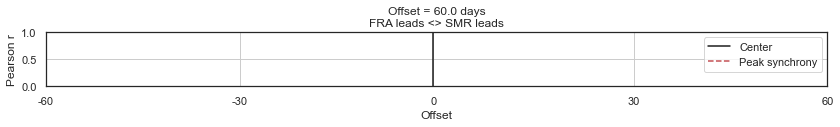

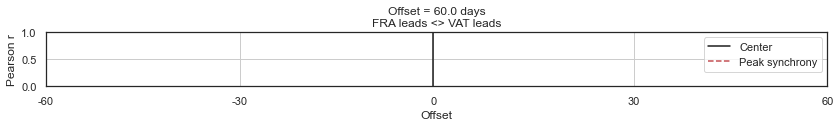

In [65]:
days = 60 # lead lag + & - windows 

iso = 'FRA'
d1 = data1_cases['positive_rate'][iso].dropna()

plt.rcParams.update({'figure.max_open_warning': 0}) # do not show warnings

offsets_dict = {}
for c in tqdm(data1_case_demean_corr_iso.sort_values(iso,ascending=False).index):
    
    d2 = data1_cases.loc[d1.index,'positive_rate'][c]
    rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
    offset = np.ceil(len(rs)/2-1)-np.argmax(rs)
    offsets_dict[c] = offset
    f,ax=plt.subplots(figsize=(14,1))
    ax.plot(rs)
    ax.axvline(np.ceil(len(rs)/2-1),color='k',linestyle='-',label='Center')
    ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
    ax.set(title=f'Offset = {offset} days\n{iso} leads <> {c} leads',ylim=[-0,1],xlim=[0,60], xlabel='Offset',ylabel='Pearson r')
    ax.set_xticks([0, 30, 60, 91, 121])
    ax.set_xticklabels([-60, -30, 0, 30, 60]);
    plt.grid()
    plt.legend()

In [82]:
offsets_df_dict={}
days = 60 # lead lag + & - windows 

for iso in tqdm(iso_codes):
    d1 = data1_cases['positive_rate'][iso].dropna()
    offsets_dict = {}
    
    for c in data1_case_demean_corr_iso.sort_values(iso, ascending=False).index:
        d2 = data1_cases.loc[d1.index,'positive_rate'][c]
        rs = [crosscorr(d1,d2, lag) for lag in range(-int(days),int(days+1))]
        offset = np.ceil(len(rs)/2-1)-np.argmax(rs)
        offsets_dict[c] = offset
    #     plt.rcParams.update({'figure.max_open_warning': 0}) # do not show warnings
    #     f,ax=plt.subplots(figsize=(14,1))
    #     ax.plot(rs)
    #     ax.axvline(np.ceil(len(rs)/2-1),color='k',linestyle='-',label='Center')
    #     ax.axvline(np.argmax(rs),color='r',linestyle='--',label='Peak synchrony')
    #     ax.set(title=f'Offset = {offset} days\n{iso} leads <> {c} leads',ylim=[-0,1],xlim=[0,60], xlabel='Offset',ylabel='Pearson r')
    #     ax.set_xticks([0, 30, 60, 91, 121])
    #     ax.set_xticklabels([-60, -30, 0, 30, 60]);
    #     plt.grid()
    #     plt.legend()
    
    offsets_df_dict[iso] = pd.DataFrame(data={'iso':offsets_dict.keys(), iso:offsets_dict.values()}).set_index('iso')

100%|██████████| 46/46 [01:45<00:00,  2.29s/it]


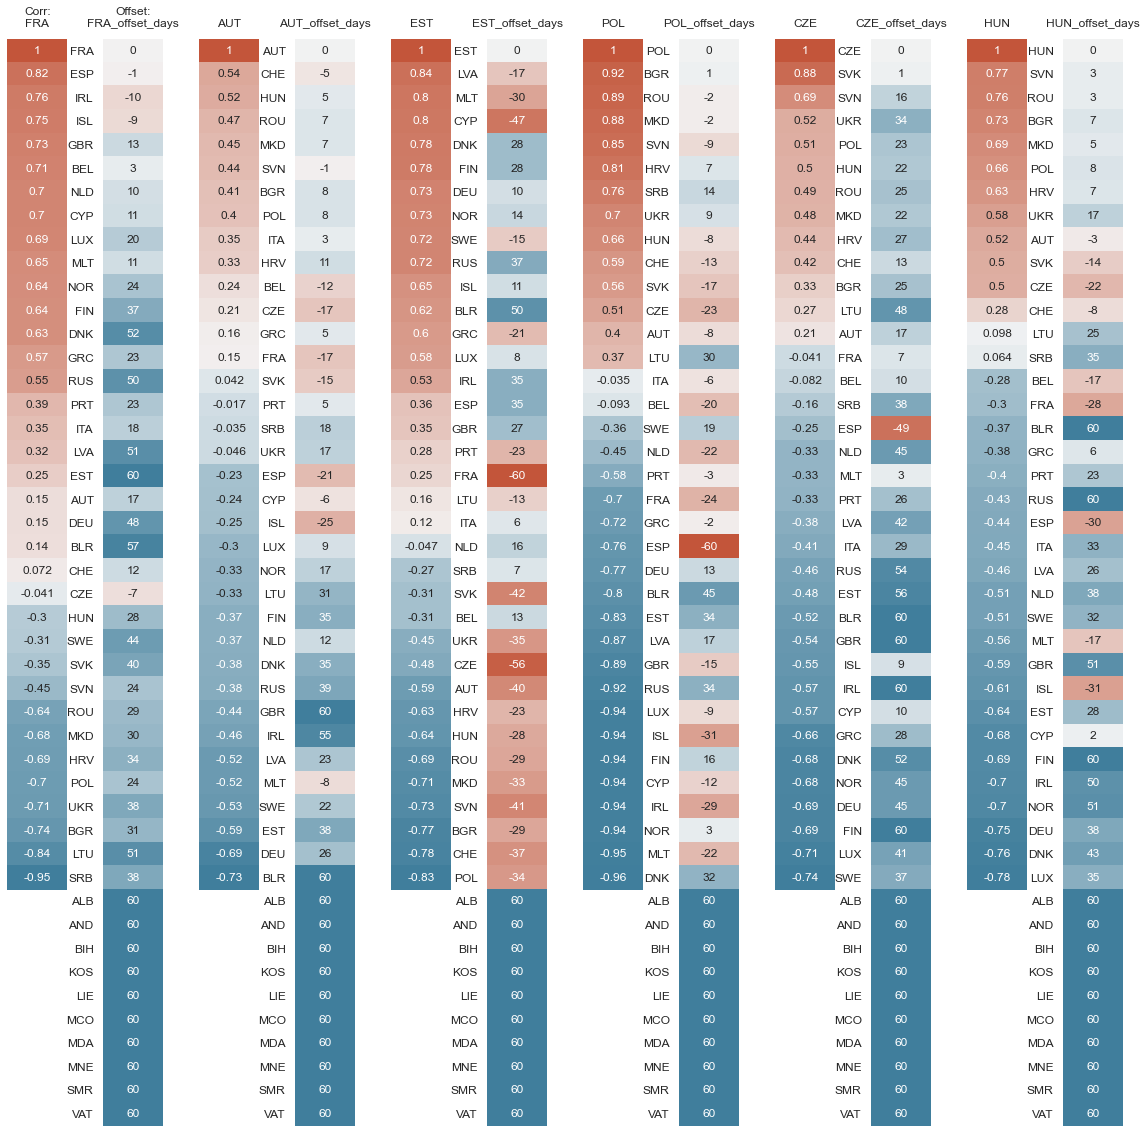

In [81]:
fig, (ax1, ax11, ax2, ax22, ax3, ax33, ax4, ax44, ax5, ax55, ax6, ax66) = plt.subplots(1,12, figsize=(20,20))
#fig.subplots_adjust(hspace=1)
fig.subplots_adjust(wspace=0.6)
cmap2=sns.diverging_palette(20, 230, as_cmap=True)
g1=sns.heatmap(data1_case_demean_corr_iso[['FRA']].sort_values('FRA',ascending=False), annot=True, ax=ax1, cmap=cmap, cbar=False)
g11=sns.heatmap(offsets_df_dict['FRA'], annot=True, cmap=cmap2, ax=ax11, center=0, cbar=False)
g2=sns.heatmap(data1_case_demean_corr_iso[['AUT']].sort_values('AUT',ascending=False), annot=True, ax=ax2, cmap=cmap, cbar=False)
g22=sns.heatmap(offsets_df_dict['AUT'], annot=True, cmap=cmap2, ax=ax22, center=0, cbar=False)
g3=sns.heatmap(data1_case_demean_corr_iso[['EST']].sort_values('EST',ascending=False), annot=True, ax=ax3, cmap=cmap, cbar=False)
g33=sns.heatmap(offsets_df_dict['EST'], annot=True, cmap=cmap2, ax=ax33, center=0, cbar=False)
g4=sns.heatmap(data1_case_demean_corr_iso[['POL']].sort_values('POL',ascending=False), annot=True, ax=ax4, cmap=cmap, cbar=False)
g44=sns.heatmap(offsets_df_dict['POL'], annot=True, cmap=cmap2, ax=ax44, center=0, cbar=False)
g5=sns.heatmap(data1_case_demean_corr_iso[['CZE']].sort_values('CZE',ascending=False), annot=True, ax=ax5, cmap=cmap, cbar=False)
g55=sns.heatmap(offsets_df_dict['CZE'], annot=True, cmap=cmap2, ax=ax55, center=0, cbar=False)
g6=sns.heatmap(data1_case_demean_corr_iso[['HUN']].sort_values('HUN',ascending=False), annot=True, ax=ax6, cmap=cmap, cbar=False)
g66=sns.heatmap(offsets_df_dict['HUN'], annot=True, cmap=cmap2, ax=ax66, center=0, cbar=False)

g1.set(xlabel='Corr:', ylabel=None)
g1.xaxis.set_label_position('top')
g11.set(xlabel='Offset:', ylabel=None)
g11.xaxis.set_label_position('top')
g2.set(xlabel=None, ylabel=None)
g22.set(xlabel=None, ylabel=None)
g3.set(xlabel=None, ylabel=None)
g33.set(xlabel=None, ylabel=None)
g4.set(xlabel=None, ylabel=None)
g44.set(xlabel=None, ylabel=None)
g5.set(xlabel=None, ylabel=None)
g55.set(xlabel=None, ylabel=None)
g6.set(xlabel=None, ylabel=None)
g66.set(xlabel=None, ylabel=None)

g1.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True, labelleft=False)
g11.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g2.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True, labelleft=False)
g22.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g3.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True, labelleft=False)
g33.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g4.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True, labelleft=False)
g44.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g5.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True, labelleft=False)
g55.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)
g6.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True, labelleft=False)
g66.tick_params(axis='both', which='major', labelsize=12, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.show()